

### Instructions

The objective is to develop a powerful model to predict the Output variable based on 
other relevant variables. Most of the variables have a name that describes the information 
they contain.

***Some information:***

• Variables ending in _M: variables calculated in month M

• Variables ending in _MY: variables calculated in month M-Y

• Variables ending in _XM: variables calculated on months M-X in month M

***Contents***

Here I will briefly present the organisation I adopted for my analysis and the 
pathway.

***Progression:***


**Reading the file**

• First of all, the dataset must be loaded correctly and some of the data reformatted 
so that it could not be read.


**First exploration of the dataset**

• Display the variables of the dataset, in order to see if certain data must be 
filtered (outliers which would not make sense in particular)


**Second exploration of the dataset**

• Making sense of variables, analysing correlations
• Analyse the output and provide guidance for the model
• Meaning of output 


**Choice of model**


**Reduction of the number of variables**

• Reduce the number of variables to conduct a more relevant analysis


**1st supervised learning model**

• Optimisation of hyperparameters
• Calculation of metrics


**2nd supervised learning model**

• Optimisation of hyperparameters
• Calculation of  metrics improvement of models 


**Conclusion**

• Back to the objective

• Tracks

### Libraries for analysis

In [72]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import math

%matplotlib inline

## Reading the file & Reformatting

### Loading data

In [73]:
df = pd.read_csv('Dataset_test.csv',encoding="latin1",sep=';',decimal=',')

## 1.1 Format analysis

The aim here is to ensure that the file has been read successfully and to reformat certain data if necessary.

In [74]:
df.head()

,ID,Nombres_adultes,Nombre_personnes_foyer,Age_2eme_personne,Note_credit,Encours_credit,ID_PP,Encours_credit_habitat,Montant_flux_crediteur_M1,Montant_obligations,...,Nombre_retrait_carte_M1,"Nombre_retrait_carte_M1,1",Quantité_obligations,Nombre_connexion_appli_6M,Nombre_de_connexion_appli_semaine_6M,Nombre_connexion_site_6M,Duree_connexion_moyenne_6M,Montant_flux_crediteur_M,Montant_pret_banque,Output
0,2911,2.057430,2.070880,91.042848,0.177448,"4715,49819",732f2de9240c404122f8c97b952c4cb8be8ede7f,2772.907651,9005.374276,5897.737602,...,0.160537,0.094456,262736.76140,46.683372,41.184480,48.057303,28.811906,5757.583993,124370.2918,FAUX
1,1398,2.060715,2.193722,90.715413,-0.062708,"6584,320922",1cc77d640ec2c383bef7099ff331d2ae962fd712,7094.588072,5047.824214,55655.446030,...,-0.172851,-0.170338,157962.64670,6.806368,9.210575,12.027955,-8.664351,2825.730247,130015.4600,FAUX
2,1793,1.930472,1.946847,90.588554,-0.094438,"-7792,256696",34d7809e534d6e7d83e1439cd4032201386fe9dd,-7613.883523,-692.852208,2277.193995,...,-0.037880,-0.086625,-26034.01144,3.442761,4.988904,7.072354,-21.135796,1679.601033,130904.7126,FAUX
3,1193,1.963631,1.916677,89.300012,-0.286729,"6118,791869",1539c6f04d9403928ef4e5b662490bd4787ad71d,5874.214001,1408.588664,8280.325647,...,0.994902,0.001148,336491.25330,-6.298359,-7.873857,-9.758806,-6.232009,4059.963478,123729.3778,FAUX
4,1342,2.009754,2.019892,87.706161,0.284325,"-4266,843489",27524f055875f70d102006ee6dcb360e982c4a69,-4459.202674,-889.296675,59977.521970,...,-0.027045,0.080714,-10631.26532,3.056277,4.414500,5.862660,-28.520162,1719.696619,126770.7544,FAUX


In [75]:
df.shape

(3015, 27)

In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3015 entries, 0 to 3014
Data columns (total 27 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   ID                                    3015 non-null   int64  
 1   Nombres_adultes                       3005 non-null   float64
 2   Nombre_personnes_foyer                3006 non-null   float64
 3   Age_2eme_personne                     3013 non-null   float64
 4   Note_credit                           3010 non-null   float64
 5   Encours_credit                        2993 non-null   object 
 6   ID_PP                                 3008 non-null   object 
 7   Encours_credit_habitat                3011 non-null   float64
 8   Montant_flux_crediteur_M1             3011 non-null   float64
 9   Montant_obligations                   3011 non-null   float64
 10  Montant_operation_crediteur_DAV_M1    3002 non-null   float64
 11  Montant_operation

### Conversion problem on Outstanding_credit

The majority of the columns that contain floats have been converted, except for Outstanding_credit

- Outstanding_credit: Money that has been lent but not yet repaid.

### [Outstanding_credit] - Reformatting

We will therefore reformat this value column in order to be able to conduct analyses

In [77]:
df.Encours_credit[14:34]

14    PAS DENCOURS
15    -4648,965858
16     9654,794858
17    -14351,44645
18    -1636,208879
19    -9442,465683
20    -8047,237148
21    -2059,018592
22     3981,916098
23     -2517,34467
24    -6878,210721
25     182,6623636
26    -5287,245058
27    -10360,55858
28      11300,4433
29    -3482,976268
30     10768,15036
31    -18316,31167
32     2641,386869
33             NaN
Name: Encours_credit, dtype: object

 

It is easier to understand why the conversion could not be done: it is necessary to take into account people who do not have outstanding loans (NO LOANS), or for whom we do 
not know the information (NaN)


### Outstanding_credit formatting

In order to keep the credit outstanding meaningful, I propose to separate this column into 
two columns:
    
| Encours_credit_bool             | Encours_credit_value |
| ------------------------------- | -------------------- |
| 1 (True)                            | -1151                |
| 0 (False (Remplace 'PAS DENCOURS')) | NaN                  |


In [78]:
""""Creation of two arrays encours_credit_bool & encours_credit_value """
def create_encours_credit_bool_and_value(df):
    encours_credit = df['Encours_credit'].tolist()
    """Function that constructs the two arrays mentioned above"""
    encours_credit_bool = [1]*len(encours_credit)
    encours_credit_value =[np.nan]*len(encours_credit)
    for (i,encours) in enumerate(encours_credit): 
        """Browse the list encours_credit : encours is a str at the moment"""
        if encours =="PAS DENCOURS":
            encours_credit_bool[i] = 0
        else : 
            """There is an outstanding amount, we will have to convert the str into a float: attention sep ',' """
            try :
                """It may be that encours is a NaN so we use try & except"""
                encours_float = '.'.join(encours.split(',')) # Use of split for conversion
                encours_float = float(encours_float)
                encours_credit_value[i] = encours_float
            except : 
                encours_credit_bool[i] = np.nan
                
    """We can send the arrays back"""
    return(encours_credit_bool,encours_credit_value)

In [79]:
encours_credit_bool,encours_credit_values = create_encours_credit_bool_and_value(df)

We check if the structure is in accordance with what we had envisaged

In [80]:
encours = pd.DataFrame(zip(encours_credit_bool,encours_credit_values),columns=['Encours_credit_bool','Encours_credit_value'])

In [81]:
encours.iloc[13:34,:]
## Reformatting worked well

,Encours_credit_bool,Encours_credit_value
13,1.0,5286.493638
14,0.0,NaN
15,1.0,-4648.965858
16,1.0,9654.794858
17,1.0,-14351.446450
18,1.0,-1636.208879
19,1.0,-9442.465683
20,1.0,-8047.237148
21,1.0,-2059.018592
22,1.0,3981.916098


**Modification of outstanding amounts in the dataframe**

In [82]:
df1 = df.copy()

**We will insert our outstanding dataframe in place of 'Outstanding_credit'.**

In [83]:
df1.iloc[:2,:5]

,ID,Nombres_adultes,Nombre_personnes_foyer,Age_2eme_personne,Note_credit
0,2911,2.057430,2.070880,91.042848,0.177448
1,1398,2.060715,2.193722,90.715413,-0.062708


In [84]:
encours.head(2)

,Encours_credit_bool,Encours_credit_value
0,1.0,4715.498190
1,1.0,6584.320922


In [85]:
df1.iloc[:2,6:]

,ID_PP,Encours_credit_habitat,Montant_flux_crediteur_M1,Montant_obligations,Montant_operation_crediteur_DAV_M1,Montant_operation_crediteur_DAV_M,Montant_operation_debiteur_DAV_M1,Montant_operation_debiteur_DAV_M,Montant_retrait_carte_M,Montant_retrait_carte_M1,...,Nombre_retrait_carte_M1,"Nombre_retrait_carte_M1,1",Quantité_obligations,Nombre_connexion_appli_6M,Nombre_de_connexion_appli_semaine_6M,Nombre_connexion_site_6M,Duree_connexion_moyenne_6M,Montant_flux_crediteur_M,Montant_pret_banque,Output
0,732f2de9240c404122f8c97b952c4cb8be8ede7f,2772.907651,9005.374276,5897.737602,4498.397638,7930.203493,4997.109487,9488.923224,31.338746,25.008051,...,0.160537,0.094456,262736.7614,46.683372,41.184480,48.057303,28.811906,5757.583993,124370.2918,FAUX
1,1cc77d640ec2c383bef7099ff331d2ae962fd712,7094.588072,5047.824214,55655.446030,1890.630239,-1655.250533,1669.661800,1494.971252,-0.191790,-3.399387,...,-0.172851,-0.170338,157962.6467,6.806368,9.210575,12.027955,-8.664351,2825.730247,130015.4600,FAUX


In [86]:
def concat_df_encours(df,encours):
    """We split df into two parts, with outstanding_credit being the 6th column of df"""
    part1 = df.iloc[:,:5]
    part2 = df.iloc[:,6:]
    df1 = pd.concat([part1,encours],axis=1)
    df1 = pd.concat([df1,part2],axis=1)
    return(df1)

In [87]:
df1 = concat_df_encours(df,encours)

In [88]:
df1.head()

,ID,Nombres_adultes,Nombre_personnes_foyer,Age_2eme_personne,Note_credit,Encours_credit_bool,Encours_credit_value,ID_PP,Encours_credit_habitat,Montant_flux_crediteur_M1,...,Nombre_retrait_carte_M1,"Nombre_retrait_carte_M1,1",Quantité_obligations,Nombre_connexion_appli_6M,Nombre_de_connexion_appli_semaine_6M,Nombre_connexion_site_6M,Duree_connexion_moyenne_6M,Montant_flux_crediteur_M,Montant_pret_banque,Output
0,2911,2.057430,2.070880,91.042848,0.177448,1.0,4715.498190,732f2de9240c404122f8c97b952c4cb8be8ede7f,2772.907651,9005.374276,...,0.160537,0.094456,262736.76140,46.683372,41.184480,48.057303,28.811906,5757.583993,124370.2918,FAUX
1,1398,2.060715,2.193722,90.715413,-0.062708,1.0,6584.320922,1cc77d640ec2c383bef7099ff331d2ae962fd712,7094.588072,5047.824214,...,-0.172851,-0.170338,157962.64670,6.806368,9.210575,12.027955,-8.664351,2825.730247,130015.4600,FAUX
2,1793,1.930472,1.946847,90.588554,-0.094438,1.0,-7792.256696,34d7809e534d6e7d83e1439cd4032201386fe9dd,-7613.883523,-692.852208,...,-0.037880,-0.086625,-26034.01144,3.442761,4.988904,7.072354,-21.135796,1679.601033,130904.7126,FAUX
3,1193,1.963631,1.916677,89.300012,-0.286729,1.0,6118.791869,1539c6f04d9403928ef4e5b662490bd4787ad71d,5874.214001,1408.588664,...,0.994902,0.001148,336491.25330,-6.298359,-7.873857,-9.758806,-6.232009,4059.963478,123729.3778,FAUX
4,1342,2.009754,2.019892,87.706161,0.284325,1.0,-4266.843489,27524f055875f70d102006ee6dcb360e982c4a69,-4459.202674,-889.296675,...,-0.027045,0.080714,-10631.26532,3.056277,4.414500,5.862660,-28.520162,1719.696619,126770.7544,FAUX


**[Modification of the outstanding credit].**

At the end of this first part we were able to rework the dataframe and in particular the "Outstanding_credit" column in order to simplify the analysis

### 1.2 - Distribution of data and outliers

Now that we have been able to load the dataset correctly, we need to see if there are any anomalies in the dataset

In [89]:
df = df1 

In [90]:
df.describe()

,ID,Nombres_adultes,Nombre_personnes_foyer,Age_2eme_personne,Note_credit,Encours_credit_bool,Encours_credit_value,Encours_credit_habitat,Montant_flux_crediteur_M1,Montant_obligations,...,Montant_retrait_carte_M1,Nombre_retrait_carte_M1,"Nombre_retrait_carte_M1,1",Quantité_obligations,Nombre_connexion_appli_6M,Nombre_de_connexion_appli_semaine_6M,Nombre_connexion_site_6M,Duree_connexion_moyenne_6M,Montant_flux_crediteur_M,Montant_pret_banque
count,3015.000000,3005.000000,3006.000000,3.013000e+03,3010.000000,2993.000000,2970.000000,3011.000000,3011.000000,3.011000e+03,...,3008.000000,3011.000000,3010.000000,3.009000e+03,2994.000000,2994.000000,2996.000000,3006.000000,3009.000000,3008.00000
mean,1505.492206,1.651430,2.139211,2.247984e+03,4.087619,0.992315,67733.356217,66183.088854,3430.032454,1.057915e+04,...,25.181340,0.141723,0.150699,1.941102e+05,21.343223,26.634469,33.320717,102.902545,4069.769709,129798.31574
std,869.645684,3.073339,1.130802,7.714272e+04,3.901568,0.087339,97274.363255,97054.712799,12601.220620,3.639671e+04,...,127.211080,0.815417,0.976184,2.198428e+06,42.840104,57.345026,74.547646,151.341643,17200.093454,50784.99592
min,0.000000,-45.154000,0.628834,-1.014041e+01,-1.243272,0.000000,-35268.964050,-35446.980780,-12073.545780,-1.111274e+04,...,-61.640257,-0.276593,-0.287192,-5.665139e+05,-12.976680,-15.128918,-19.493009,-43.124721,-5509.113441,-12165.56655
25%,752.500000,1.023015,1.099215,1.193945e+00,0.060387,1.000000,-49.319006,-1058.635777,-355.231937,1.663585e+02,...,-8.283941,-0.045147,-0.050422,-4.443938e+04,0.940546,1.122001,1.411483,7.331611,494.447401,124794.80720
50%,1506.000000,1.958080,1.979002,3.295269e+01,6.071823,1.000000,15300.678100,12956.683190,2173.796979,4.705268e+03,...,1.666568,0.010977,0.006696,7.685730e+04,6.721483,8.460031,10.834154,57.338650,1963.882364,129489.98350
75%,2259.500000,2.011098,2.634577,4.842538e+01,6.646759,1.000000,122237.835025,121627.982600,5120.094253,9.941821e+03,...,12.740980,0.066336,0.073643,2.001135e+05,23.635741,29.717792,36.966530,150.928176,3801.005236,134389.96840
max,2999.000000,157.000000,8.029462,3.651695e+06,14.147356,1.000000,779946.571100,779588.699300,397248.044000,1.003670e+06,...,2406.320620,17.061262,23.098115,1.001995e+08,786.034686,1271.847271,1731.175163,2085.949319,367964.823600,722428.89020


**Skewness & kurtosis analysis**

The aim is to analyse the distribution and symmetry of the data to see if there are outliers

In [91]:
df.skew()

C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_20716\1665899112.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.skew()


ID                                      -0.003092
Nombres_adultes                         41.276719
Nombre_personnes_foyer                   1.183082
Age_2eme_personne                       40.209588
Note_credit                              0.346819
Encours_credit_bool                    -11.281211
Encours_credit_value                     1.749415
Encours_credit_habitat                   1.735483
Montant_flux_crediteur_M1               18.673586
Montant_obligations                     12.031500
Montant_operation_crediteur_DAV_M1       9.193942
Montant_operation_crediteur_DAV_M       10.888899
Montant_operation_debiteur_DAV_M1        9.139366
Montant_operation_debiteur_DAV_M         6.699842
Montant_retrait_carte_M                  6.679253
Montant_retrait_carte_M1                 7.778168
Nombre_retrait_carte_M1                 12.031966
Nombre_retrait_carte_M1,1               14.905489
Quantité_obligations                    36.016058
Nombre_connexion_appli_6M                6.132051


**In order to familiarise ourselves with the dataset we will display each of the components**

In [92]:
def plot_skew_kurt(df):
    subplot_pos =[121,122] ## Subplot 2 per line
    legends =['',''] # To store the chart legend of each plot in the line
    for (i,cols) in enumerate(df.skew().index[1:]):
        ## Selection of all features except ID
        plt.subplot(subplot_pos[i%2])
        legend = f'{cols} - sk : {round(df.skew().values[i+1])} - kurt :{round(df.kurtosis().values[i+1])}'
        legends[i%2] = legend 
        plt.scatter(df.index,df[cols])
        if i%2==0: ## End of line
            print('  | '.join(legends))
            plt.subplots_adjust(right = 2)
            plt.show()

C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_20716\4075012129.py:4: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  for (i,cols) in enumerate(df.skew().index[1:]):
C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_20716\4075012129.py:7: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  legend = f'{cols} - sk : {round(df.skew().values[i+1])} - kurt :{round(df.kurtosis().values[i+1])}'


Nombres_adultes - sk : 41 - kurt :2199  | 


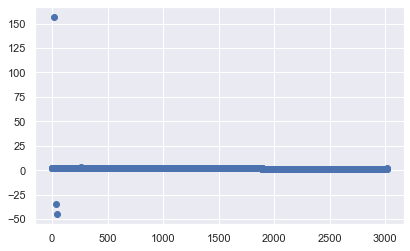

Age_2eme_personne - sk : 40 - kurt :1762  | Nombre_personnes_foyer - sk : 1 - kurt :1


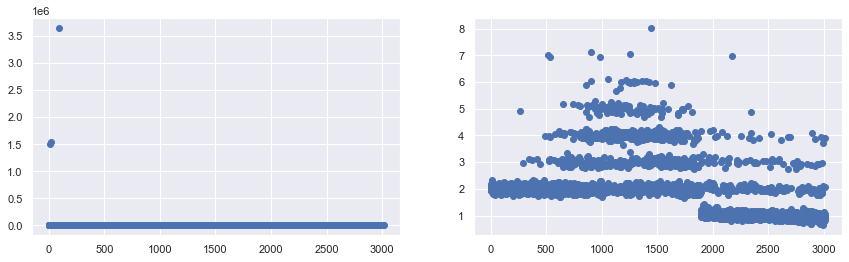

Encours_credit_bool - sk : -11 - kurt :125  | Note_credit - sk : 0 - kurt :-1


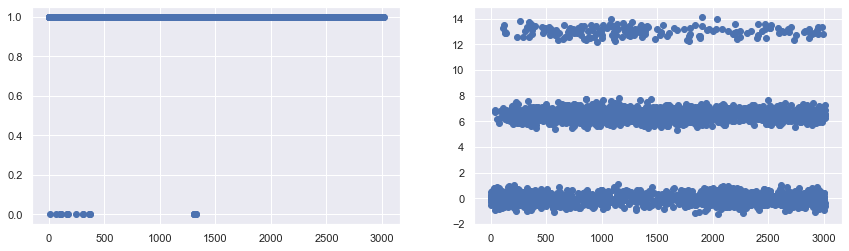

Encours_credit_habitat - sk : 2 - kurt :4  | Encours_credit_value - sk : 2 - kurt :4


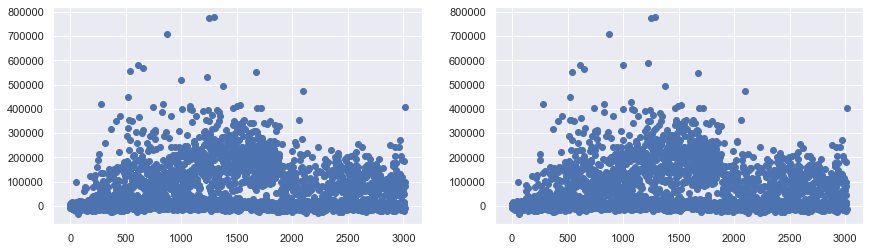

Montant_obligations - sk : 12 - kurt :236  | Montant_flux_crediteur_M1 - sk : 19 - kurt :483


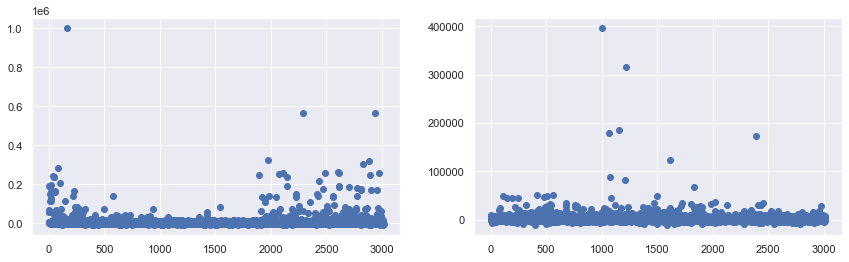

Montant_operation_crediteur_DAV_M - sk : 11 - kurt :170  | Montant_operation_crediteur_DAV_M1 - sk : 9 - kurt :97


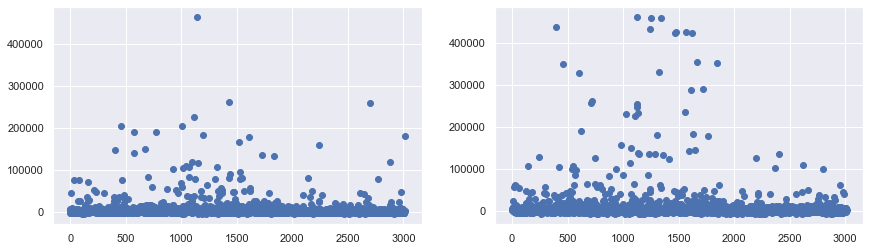

Montant_operation_debiteur_DAV_M - sk : 7 - kurt :52  | Montant_operation_debiteur_DAV_M1 - sk : 9 - kurt :95


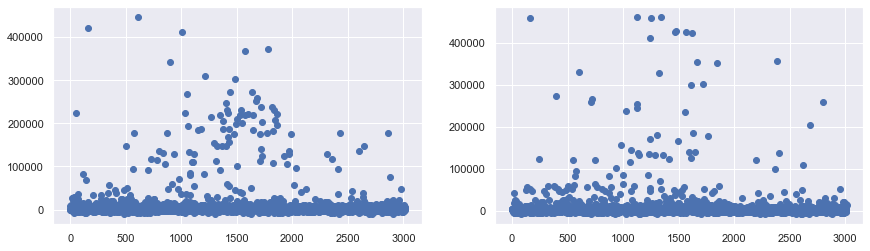

Montant_retrait_carte_M1 - sk : 8 - kurt :83  | Montant_retrait_carte_M - sk : 7 - kurt :53


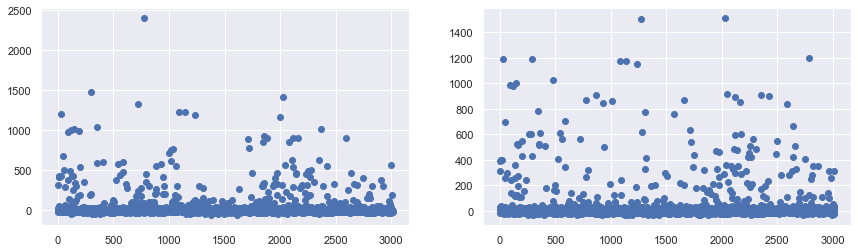

Nombre_retrait_carte_M1,1 - sk : 15 - kurt :293  | Nombre_retrait_carte_M1 - sk : 12 - kurt :201


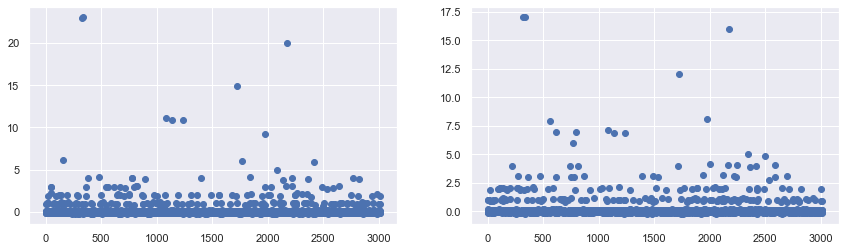

Nombre_connexion_appli_6M - sk : 6 - kurt :76  | Quantité_obligations - sk : 36 - kurt :1508


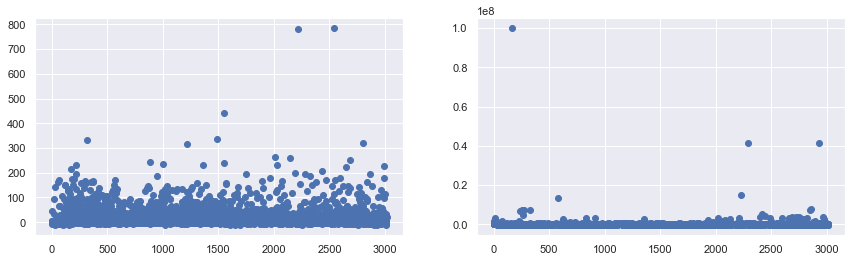

Nombre_connexion_site_6M - sk : 10 - kurt :184  | Nombre_de_connexion_appli_semaine_6M - sk : 9 - kurt :154


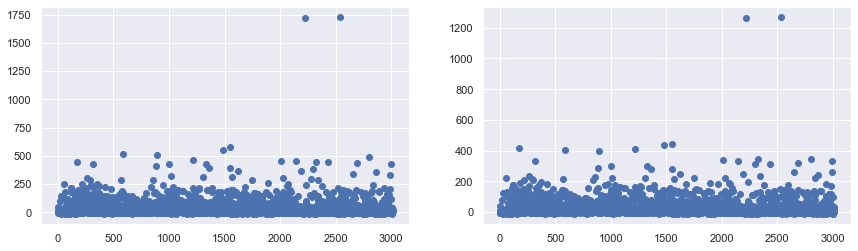

Montant_flux_crediteur_M - sk : 16 - kurt :287  | Duree_connexion_moyenne_6M - sk : 4 - kurt :31


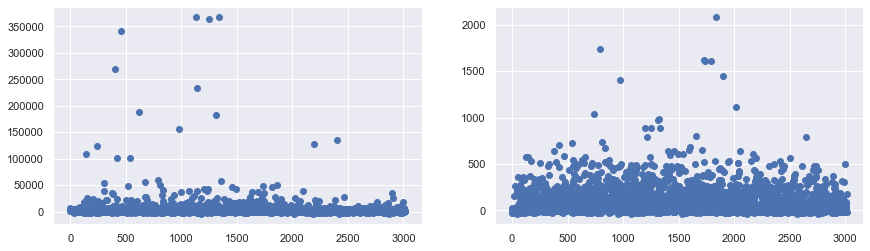

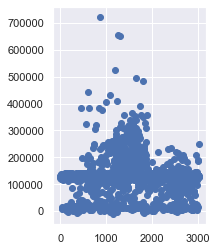

In [93]:
plot_skew_kurt(df) #  Scatter plot of the variable & display its skewness and kurtosis


### Removing outliers

We notice that 3 features have a very high kurtosis & skewness - the plot confirms the presence of outliers:

For these two features, it is necessary to separate all outliers, as they are 
meaningless, e.g.: max(Adult_numbers) = 157

• Adult_numbers

• Age_2nd_person


For this feature, we will only remove the maximum (1 000 000)
• Obligation_quantities

### Filtering outliers

In [94]:
"""With the following parameters one can :
Remove outliers for Adult_numbers >25 or <0 (no negative adult_numbers)
Remove age outliers: >200
Quantity of bonds: We remove the max which distorts the dataset and 
is much too far from the other values
"""

outliers_filters = (df.Nombres_adultes>25)|(df.Nombres_adultes<0)|(df.Age_2eme_personne>200)|(df.Quantité_obligations==max(df.Quantité_obligations))

In [95]:
"Here is the data we will remove from the dataset"
df[outliers_filters]

,ID,Nombres_adultes,Nombre_personnes_foyer,Age_2eme_personne,Note_credit,Encours_credit_bool,Encours_credit_value,ID_PP,Encours_credit_habitat,Montant_flux_crediteur_M1,...,Nombre_retrait_carte_M1,"Nombre_retrait_carte_M1,1",Quantité_obligations,Nombre_connexion_appli_6M,Nombre_de_connexion_appli_semaine_6M,Nombre_connexion_site_6M,Duree_connexion_moyenne_6M,Montant_flux_crediteur_M,Montant_pret_banque,Output
13,1125,1.988612,1.996277,1.500000e+06,0.468081,1.0,5286.493638,dc5c0440a9a7fa6e56ef9c41ec30044dfc6aafe2,3887.092790,-728.100980,...,1.030981,1.119442,1.315948e+06,-1.117414,-0.988967,-0.885137,-21.857154,3629.066274,123788.7548,FAUX
20,2436,157.000000,2.207566,8.286753e+01,0.124294,1.0,-8047.237148,b9da2f10fa9da8a341c9270d22825508bb01c3aa,-7553.047311,2303.188415,...,0.028504,0.012999,-6.527436e+04,-6.175580,-5.440543,-6.487811,3.370448,1632.176481,129916.1813,VRAI
23,30,1.998692,1.870891,1.534521e+06,-0.327990,1.0,-2517.344670,c368cc66aff85ee21a1a90964c611b23d15a2e12,-2604.063097,2827.502265,...,-0.009947,-0.028837,1.891141e+06,93.231513,80.120497,100.353803,268.078651,4517.537171,136168.2920,FAUX
38,2763,-35.000000,1.833692,7.956678e+01,0.164459,1.0,-9726.573835,ddbf56d6a375013d611d93a608c862af27f376d0,-10332.358080,-795.964305,...,-0.039791,-0.034498,9.370660e+04,2.489446,0.090541,-0.143907,-13.595050,1542.499101,129448.9522,FAUX
45,2311,-45.154000,1.980447,7.860640e+01,-0.224071,1.0,-1361.812353,00c496dc805e6d74d21b803aaf0d5b3334faa349,-1421.340490,653.830813,...,0.934992,2.930379,7.564783e+04,3.631247,4.646773,4.737960,17.970802,4789.286357,135816.6949,FAUX
90,390,1.927201,1.774959,3.651695e+06,-0.462633,1.0,-4117.758621,01e45b8e536995696fd685d6e1f49bfc819168d4,-3146.248259,-1242.853205,...,0.107656,0.052591,1.136401e+05,29.385684,28.240021,31.809899,-18.751434,1116.904916,129835.9530,FAUX
164,808,2.037934,1.984801,6.773047e+01,-0.120481,1.0,-3012.301219,aca550f13c3627508b776a1b5a8a8876e65b04d7,-2753.502799,8897.974922,...,0.019288,0.008760,1.001995e+08,89.816645,80.038331,112.270599,374.607394,22950.805510,113190.3472,VRAI


In [96]:
outliers_index = df[outliers_filters].index #On garde les index des outliers

In [97]:
df1 = df.copy()

In [98]:
df1 = df[~df.index.isin(outliers_index)].reset_index(drop=True) # On met les outliers de côtés

**After filtering outliers - New skewness & kurtosis analysis**

In [99]:
df1.shape

(3008, 28)

In [100]:
df.shape

(3015, 28)

In [101]:
df1.describe()

,ID,Nombres_adultes,Nombre_personnes_foyer,Age_2eme_personne,Note_credit,Encours_credit_bool,Encours_credit_value,Encours_credit_habitat,Montant_flux_crediteur_M1,Montant_obligations,...,Montant_retrait_carte_M1,Nombre_retrait_carte_M1,"Nombre_retrait_carte_M1,1",Quantité_obligations,Nombre_connexion_appli_6M,Nombre_de_connexion_appli_semaine_6M,Nombre_connexion_site_6M,Duree_connexion_moyenne_6M,Montant_flux_crediteur_M,Montant_pret_banque
count,3008.000000,2998.000000,2999.000000,3006.000000,3003.000000,2986.000000,2963.000000,3004.000000,3004.000000,3004.000000,...,3001.000000,3004.000000,3003.000000,3.002000e+03,2987.000000,2987.000000,2989.000000,2999.000000,3002.000000,3001.000000
mean,1505.716755,1.627001,2.139653,28.825561,4.097274,0.992297,67901.304252,66345.274303,3434.058636,10129.304274,...,25.102147,0.141363,0.149698,1.600444e+05,21.322513,26.634380,33.317904,102.939389,4065.875676,129801.788927
std,869.290959,0.484844,1.132066,24.892164,3.900953,0.087441,97327.508262,97109.294226,12614.628178,31365.482407,...,127.143296,0.816060,0.975823,1.228497e+06,42.843987,57.386837,74.600335,151.339618,17216.479346,50842.935701
min,0.000000,0.869316,0.628834,-10.140412,-1.243272,0.000000,-35268.964050,-35446.980780,-12073.545780,-11112.742260,...,-61.640257,-0.276593,-0.287192,-5.665139e+05,-12.976680,-15.128918,-19.493009,-43.124721,-5509.113441,-12165.566550
25%,752.750000,1.023053,1.098764,1.184886,0.061701,1.000000,61.072253,-909.148867,-352.258920,160.153010,...,-8.255494,-0.045272,-0.050706,-4.461642e+04,0.941826,1.125489,1.417528,7.422034,491.620936,124798.290300
50%,1506.500000,1.958061,1.978972,32.919935,6.073068,1.000000,15415.914820,13019.576045,2175.508736,4688.742024,...,1.667738,0.010836,0.006588,7.683218e+04,6.726718,8.460611,10.838098,57.417767,1963.766421,129486.913900
75%,2258.250000,2.011032,2.744282,48.332106,6.651442,1.000000,122706.730700,121855.129975,5122.783487,9931.201318,...,12.734430,0.066320,0.073626,1.997422e+05,23.594110,29.699475,36.884775,150.901409,3796.772909,134389.615800
max,2999.000000,3.006550,8.029462,91.042848,14.147356,1.000000,779946.571100,779588.699300,397248.044000,565896.779800,...,2406.320620,17.061262,23.098115,4.163348e+07,786.034686,1271.847271,1731.175163,2085.949319,367964.823600,722428.890200


In [102]:
df1.skew()

C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_20716\149261804.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df1.skew()


ID                                      -0.003028
Nombres_adultes                         -0.505495
Nombre_personnes_foyer                   1.180729
Age_2eme_personne                        0.112854
Note_credit                              0.343199
Encours_credit_bool                    -11.267715
Encours_credit_value                     1.746434
Encours_credit_habitat                   1.732454
Montant_flux_crediteur_M1               18.656586
Montant_obligations                      8.234687
Montant_operation_crediteur_DAV_M1       9.188814
Montant_operation_crediteur_DAV_M       10.934636
Montant_operation_debiteur_DAV_M1        9.183713
Montant_operation_debiteur_DAV_M         6.607157
Montant_retrait_carte_M                  6.697234
Montant_retrait_carte_M1                 7.800375
Nombre_retrait_carte_M1                 12.032151
Nombre_retrait_carte_M1,1               14.951891
Quantité_obligations                    27.089111
Nombre_connexion_appli_6M                6.143452


C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_20716\4075012129.py:4: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  for (i,cols) in enumerate(df.skew().index[1:]):
C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_20716\4075012129.py:7: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  legend = f'{cols} - sk : {round(df.skew().values[i+1])} - kurt :{round(df.kurtosis().values[i+1])}'


Nombres_adultes - sk : -1 - kurt :-2  | 


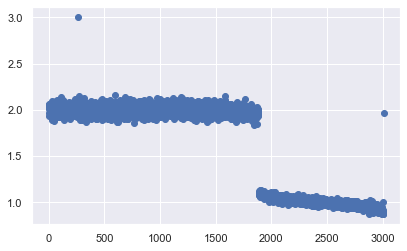

Age_2eme_personne - sk : 0 - kurt :-1  | Nombre_personnes_foyer - sk : 1 - kurt :1


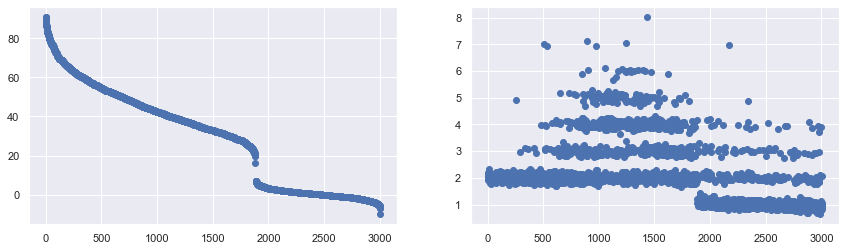

Encours_credit_bool - sk : -11 - kurt :125  | Note_credit - sk : 0 - kurt :-1


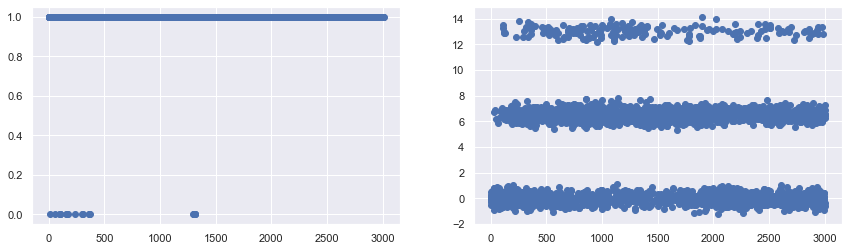

Encours_credit_habitat - sk : 2 - kurt :4  | Encours_credit_value - sk : 2 - kurt :4


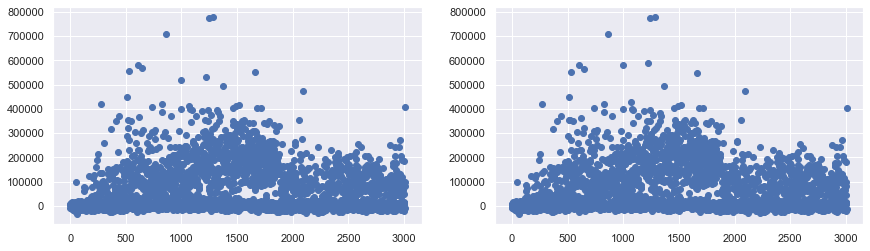

Montant_obligations - sk : 8 - kurt :95  | Montant_flux_crediteur_M1 - sk : 19 - kurt :482


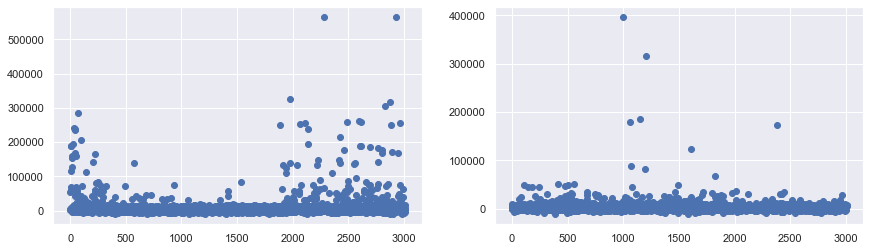

Montant_operation_crediteur_DAV_M - sk : 11 - kurt :172  | Montant_operation_crediteur_DAV_M1 - sk : 9 - kurt :97


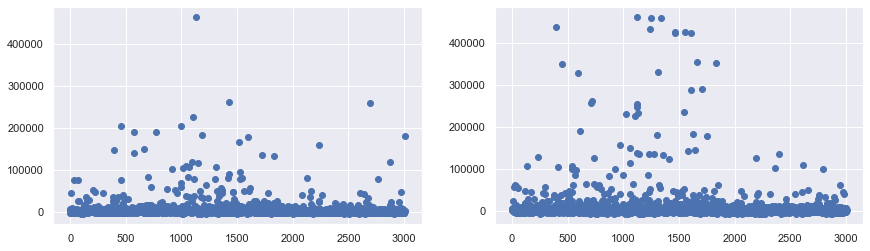

Montant_operation_debiteur_DAV_M - sk : 7 - kurt :51  | Montant_operation_debiteur_DAV_M1 - sk : 9 - kurt :97


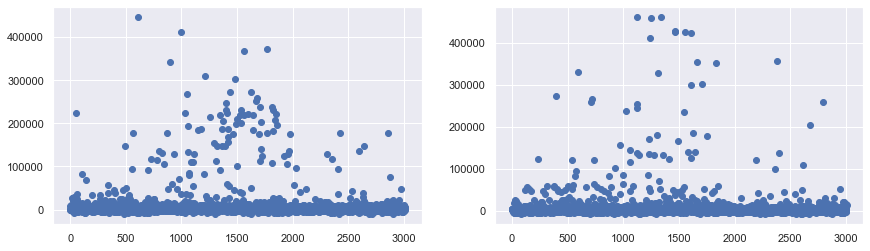

Montant_retrait_carte_M1 - sk : 8 - kurt :83  | Montant_retrait_carte_M - sk : 7 - kurt :53


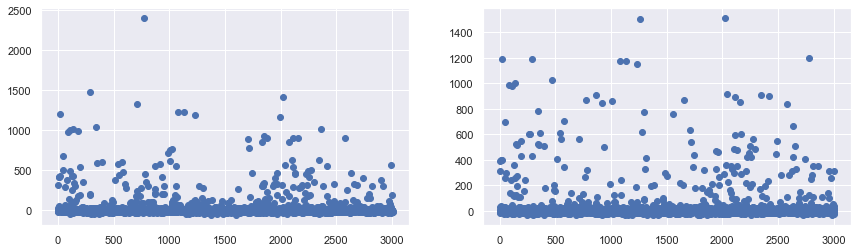

Nombre_retrait_carte_M1,1 - sk : 15 - kurt :294  | Nombre_retrait_carte_M1 - sk : 12 - kurt :201


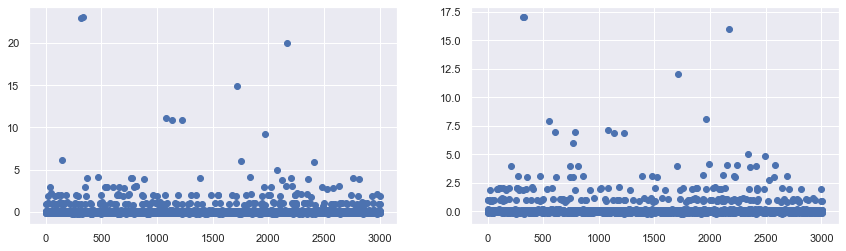

Nombre_connexion_appli_6M - sk : 6 - kurt :76  | Quantité_obligations - sk : 27 - kurt :873


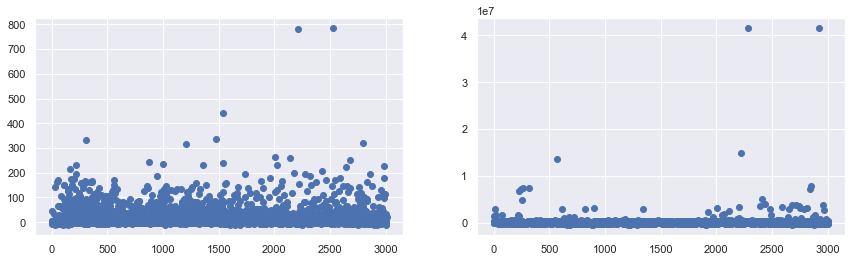

Nombre_connexion_site_6M - sk : 10 - kurt :184  | Nombre_de_connexion_appli_semaine_6M - sk : 9 - kurt :154


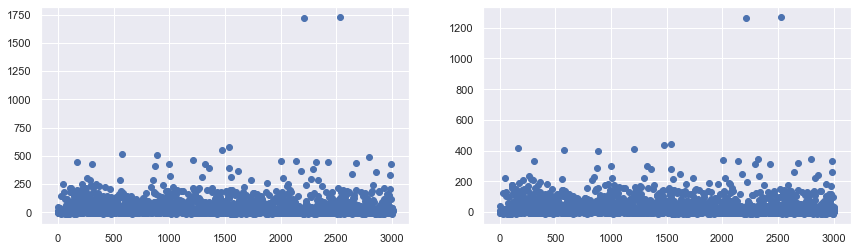

Montant_flux_crediteur_M - sk : 16 - kurt :287  | Duree_connexion_moyenne_6M - sk : 4 - kurt :31


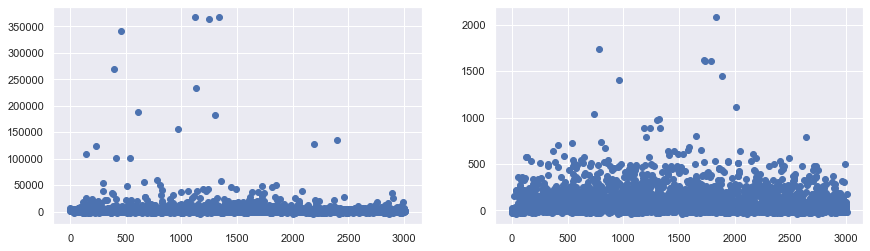

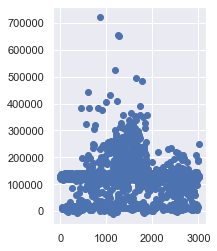

In [103]:
plot_skew_kurt(df1)

**We obtain much more consistent results for the variables from which we have removed the outliers**

**Some remarks on the dataset**

Concerning numbers_adults & age_2nd_person :

Two profiles can be noted:

• Nb Adults = 2 & Age_2nd person ∈ [20:80] :
– Couple

• Nb Adults = 1 & Age_2nd person ∈ [0:10] :
– Single parent family

## 1.3 - CSP encoding
We now have to encode the CSP column, which tells us whether the socio-occupational category of the persons studied is the same as the one we have just studied.

• CSP+: "Superior" socio-professional category
• CSP-: Socio-professional category "Lower".

In [104]:
df1.CSP[:5]

0    CSP+
1    CSP-
2    CSP+
3    CSP-
4    CSP+
Name: CSP, dtype: object

**To do this we will rename the column CSP -> CSP+ :**
• 1 - If CSP +.
• 0 - If CSP -

In [105]:
csp_dict = {'CSP+':1,'CSP-':0,np.nan:np.nan} # Utilisation d'un dictionnaire pour un encodage rapide

df1['CSP'] = [csp_dict[csp_i]  for csp_i in df1['CSP']]

## 1.4 - Transformation Output

As we have seen, output is a Boolean in French and must therefore be transformed into English :

• VRAI -> TRUE

• FAUX -> FALSE

In [106]:
df1.Output[:5]

0    FAUX
1    FAUX
2    FAUX
3    FAUX
4    FAUX
Name: Output, dtype: object

In [107]:
output_dict = {'FAUX':False,'VRAI':True,np.nan:np.nan}

In [108]:
df1['Output'] = [output_dict[output] for output in df1['Output']]

## 2. Data analysis

Now that we have loaded the dataset and reformatted the data that needed to be 
reformatted, we can look at :
• Features, values, distributions
• Output, distributions

### 2.1 Feature & output analysis

In [109]:
df = df1.copy() # We save the changes made previously on df

### Feature analysis

In [110]:
df.columns

Index(['ID', 'Nombres_adultes', 'Nombre_personnes_foyer', 'Age_2eme_personne',
       'Note_credit', 'Encours_credit_bool', 'Encours_credit_value', 'ID_PP',
       'Encours_credit_habitat', 'Montant_flux_crediteur_M1',
       'Montant_obligations', 'Montant_operation_crediteur_DAV_M1',
       'Montant_operation_crediteur_DAV_M',
       'Montant_operation_debiteur_DAV_M1', 'Montant_operation_debiteur_DAV_M',
       'Montant_retrait_carte_M', 'Montant_retrait_carte_M1', 'CSP',
       'Nombre_retrait_carte_M1', 'Nombre_retrait_carte_M1,1',
       'Quantité_obligations', 'Nombre_connexion_appli_6M',
       'Nombre_de_connexion_appli_semaine_6M', 'Nombre_connexion_site_6M',
       'Duree_connexion_moyenne_6M', 'Montant_flux_crediteur_M',
       'Montant_pret_banque', 'Output'],
      dtype='object')

### Categories within features:

> It can be seen that the features can be classified according to their belonging to the following categories

| Categories | Global Information <br> (Information on the indivudual, age, nbr adults, amount of credit, remaining credit) | Bank Transactions <br> (all transactions during the month) | Financial extracts <br> (Information of behaviour'invividual, monitoring of his bank transactions ) |
| ---------- | ------------------------------------------------------------ | ------------------------------------------------------------ | ------------------------------------------------------------ |
| Features   | Nombre_adultes \| Nombre_personnes_foyer <br> Age_2e_personne \| Note_credit \| Montant_pret_banque <br> CSP ; Encours | Montant_operation_crediteur/debiteur <br> Nombre de retraits <br> Montant_flux_créditeur | Nombre_connexion_appli <br> Nombre_connexion_site <br> Durée de connexion moyenne |

**By grouping according to these categories, the correlation analysis will be more relevant**

In [111]:
### These categories are constructed according to the table above

infos_globales_cols = ['Nombres_adultes', 'CSP','Nombre_personnes_foyer', 'Age_2eme_personne',
       'Note_credit', 'Encours_credit_bool', 'Encours_credit_value',
       'Encours_credit_habitat','Montant_pret_banque']
operations_bancaires_cols = ['Montant_flux_crediteur_M1',
       'Montant_obligations', 'Montant_operation_crediteur_DAV_M1',
       'Montant_operation_crediteur_DAV_M',
       'Montant_operation_debiteur_DAV_M1', 'Montant_operation_debiteur_DAV_M',
       'Montant_retrait_carte_M', 'Montant_retrait_carte_M1',
       'Nombre_retrait_carte_M1', 'Nombre_retrait_carte_M1,1','Montant_flux_crediteur_M','Quantité_obligations']
extra_financiers_cols = ['Nombre_connexion_appli_6M',
       'Nombre_de_connexion_appli_semaine_6M', 'Nombre_connexion_site_6M',
       'Duree_connexion_moyenne_6M']
"""Reorganisation des features_cols"""
features_cols = infos_globales_cols+operations_bancaires_cols+extra_financiers_cols

In [112]:
features = df[features_cols]

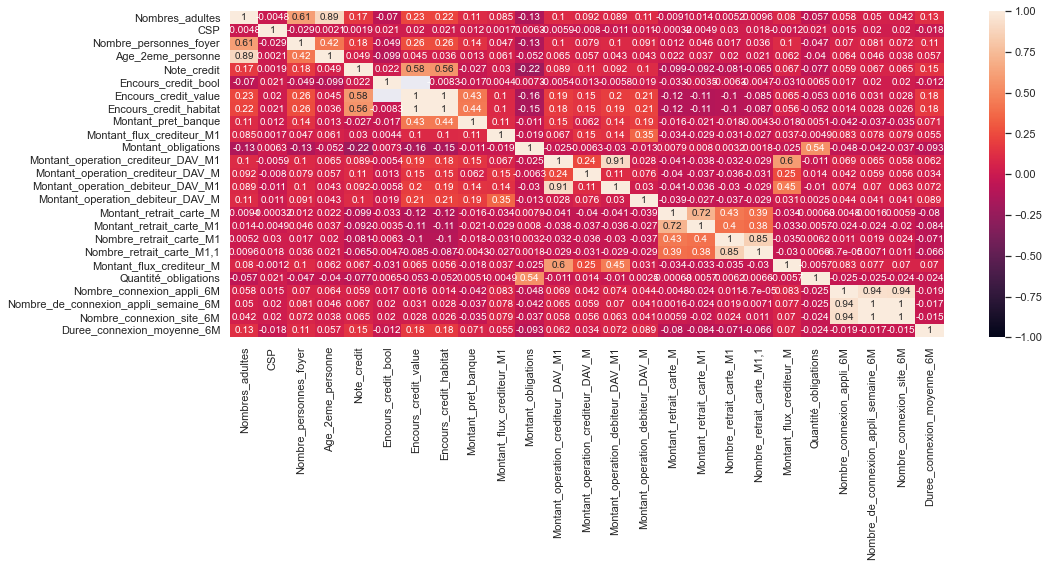

In [113]:
plt.figure(figsize=(16,6))
sns.heatmap(features.corr(),vmin=-1,vmax=1,annot=True)
plt.show()

**Correlation matrix**

This grouping by category allows us to identify matrices in the correlation matrix: this 
reflects the relationship between some variables in the same category. Some categories are 
(weakly) correlated with each other:

• Global information -- Global operations


## Analysis of [Output]

### Overall distribution

In [114]:
df.groupby('Output').count()

,ID,Nombres_adultes,Nombre_personnes_foyer,Age_2eme_personne,Note_credit,Encours_credit_bool,Encours_credit_value,ID_PP,Encours_credit_habitat,Montant_flux_crediteur_M1,...,CSP,Nombre_retrait_carte_M1,"Nombre_retrait_carte_M1,1",Quantité_obligations,Nombre_connexion_appli_6M,Nombre_de_connexion_appli_semaine_6M,Nombre_connexion_site_6M,Duree_connexion_moyenne_6M,Montant_flux_crediteur_M,Montant_pret_banque
Output,,,,,,,,,,,,,,,,,,,,,
False,2167,2159,2161,2166,2165,2150,2133,2161,2165,2164,...,2164,2163,2164,2165,2152,2149,2151,2160,2162,2162
True,833,831,830,832,830,829,823,832,831,832,...,831,833,831,829,827,830,830,832,832,832


#### It can be seen that Output is unbalanced:

* 2/3 - 1/3 : False // True

#### We will therefore have to resort to cross validation in order to best estimate the quality of our model
<br>

### Direction output & link to variables

**The variables** :  As we have seen previously, it is possible to group the variables by categories and these give information on 3 components

* *Global information*: Customer profile
* *Banking information* : Operations carried out by the customer
* *Extra-financial information* : Insurance, bank account monitoring
  
**Output** : 

This variable to be predicted takes two values: *TRUE* or *FALSE*: Given the endogenous variables, we can assume the following about Output:
<br> 
Au vu des variables endogènes on peut supposer les choses suivantes sur Output : 

* Output can characterise the fact that the customer in question is in default on his loan

    * Applications: Avoid lending money to people at risk
    
* Output can characterise whether the customer in question is a 'good customer' or not
 
    * Applications: Identify the right profiles more easily

> In order to better understand the meaning of this variable, we will proceed with a "simple" exploration with groupings according to certain variables


In [115]:
from sklearn.preprocessing import MinMaxScaler
def groupby_output(df,cols,plot=True):
    """Allows you to return the average of the variables for each type of variable"""
    all_cols = cols +['Output']
    """Data display (scale to display everything on the same graph)"""
    # First Df that allows to conduct a qualitative analysis with the meaning on the variables

    df1 = df[all_cols].groupby('Output').mean()
    # Scale df and analyse the groupby
    X = df[cols].values
    scaler = MinMaxScaler()
    X = scaler.fit_transform(X)
    df_scaled = pd.concat([pd.DataFrame(X,columns=cols),pd.DataFrame(df['Output'])],axis=1)
    # Group df_scaled
    df2 = df_scaled[all_cols].groupby('Output').mean()
    scaled_cols = df2.columns
    if plot:
        df2.plot.bar()
        plt.legend(bbox_to_anchor=(2,0.5),loc='center right')
        plt.show()
    return(df1)

## Output & Global Information

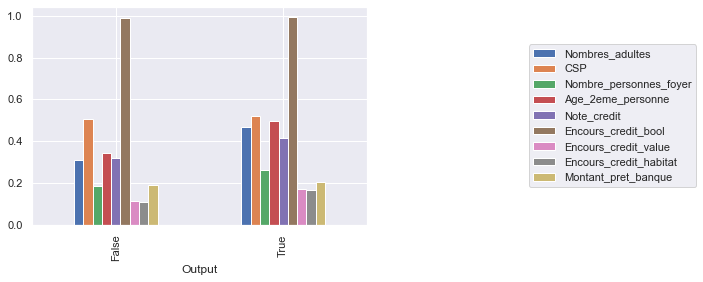

,Nombres_adultes,CSP,Nombre_personnes_foyer,Age_2eme_personne,Note_credit,Encours_credit_bool,Encours_credit_value,Encours_credit_habitat,Montant_pret_banque
Output,,,,,,,,,
False,1.533727,0.506007,1.982359,24.430347,3.698490,0.992093,54909.235507,53749.468068,127473.837470
True,1.869312,0.519856,2.551882,40.206963,5.163276,0.992762,102163.162792,99818.213237,135858.672833


In [116]:
infos_output = groupby_output(df,infos_globales_cols)
# groupby_output(infos_globales_cols)
infos_output

### Link between global information and output

**We observe that when Output is True :**
* The customer profile is different :
    * Person in couple (NbAdultes 1.8); older: 40 years old on average
* The credit rating is better 
* The amount outstanding is higher <br>

**And therefore the opposite when Output is False :** 
* Younger person, single or single parent family 
* Lower outstanding amount & lower loan amount


*Influence of the CSP parameter :* Socio-professional class does not seem to be a determining factor



In [117]:
df.groupby(['Output','CSP']).count()

ID  Nombres_adultes  Nombre_personnes_foyer  Age_2eme_personne  \
Output CSP                                                                     
False  0.0  1069             1064                    1063               1068   
       1.0  1095             1092                    1095               1095   
True   0.0   399              399                     397                398   
       1.0   432              430                     431                432   

            Note_credit  Encours_credit_bool  Encours_credit_value  ID_PP  \
Output CSP                                                                  
False  0.0         1068                 1062                  1052   1067   
       1.0         1094                 1085                  1078   1091   
True   0.0          397                  397                   393    399   
       1.0          431                  431                   429    431   

            Encours_credit_habitat  Montant_flux_crediteur_M1  ...  \
Output CSP                                                     ...   
False  0.0                    1069                       1066  ...   
       1.0                    1093                       1095  ...   
True   0.0                     397                        398  ...   
       1.0                     432                        432  ...   

            Montant_retrait_carte_M1  Nombre_retrait_carte_M1  \
Output CSP                                                      
False  0.0                      1068                     1067   
       1.0                      1091                     1093   
True   0.0                       398                      399   
       1.0                       431                      432   

            Nombre_retrait_carte_M1,1  Quantité_obligations  \
Output CSP                                                    
False  0.0                       1066                  1069   
       1.0                       1095                  1093   
True   0.0                        398                   395   
       1.0                        431                   432   

            Nombre_connexion_appli_6M  Nombre_de_connexion_appli_semaine_6M  \
Output CSP                                                                    
False  0.0                       1062                                  1060   
       1.0                       1087                                  1086   
True   0.0                        396                                   396   
       1.0                        429                                   432   

            Nombre_connexion_site_6M  Duree_connexion_moyenne_6M  \
Output CSP                                                         
False  0.0                      1062                        1064   
       1.0                      1087                        1093   
True   0.0                       396                         399   
       1.0                       432                         431   

            Montant_flux_crediteur_M  Montant_pret_banque  
Output CSP                                                 
False  0.0                      1067                 1066  
       1.0                      1092                 1093  
True   0.0                       398                  399  
       1.0                       432                  432  

[4 rows x 26 columns]

I therefore decide not to consider CSP for further analysis and modelling.
> I had first considered it but setting CSP aside improves the performance of the models!


In [118]:
features_cols.remove('CSP')

## Output & Bank Information

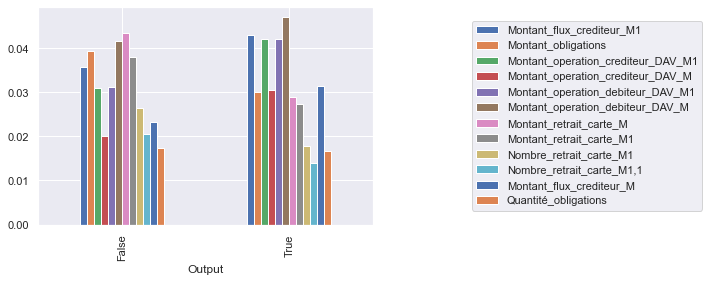

,Montant_flux_crediteur_M1,Montant_obligations,Montant_operation_crediteur_DAV_M1,Montant_operation_crediteur_DAV_M,Montant_operation_debiteur_DAV_M1,Montant_operation_debiteur_DAV_M,Montant_retrait_carte_M,Montant_retrait_carte_M1,Nombre_retrait_carte_M1,"Nombre_retrait_carte_M1,1",Montant_flux_crediteur_M,Quantité_obligations
Output,,,,,,,,,,,,
False,2618.245451,11648.642623,6572.115729,3848.981654,6257.514256,7999.454186,30.690266,32.447625,0.183974,0.193074,3226.527547,167624.961198
True,5580.669150,6229.993193,11868.746673,8786.311920,11344.509192,10501.935343,8.258883,5.931756,0.031241,0.037389,6253.349011,141311.905701


In [119]:
bancaires_output = groupby_output(df,operations_bancaires_cols)
# groupby_output(infos_globales_cols)
bancaires_output

### Link between banking and output

**We observe that when Output is True :**
* The amounts of credit flows are larger :
    * -This reflects higher incomes
* The amounts of the bonds are lower

**And therefore the opposite when Output is False :**
* Lower credit flows
* Larger number of card withdrawals

### Evolution of some variables
It is interesting to look at the evolution of certain variables:
* Montant_flux_créditeur (M(-1)->M)
* Montant_operation_crediteur_DAV (M(-1)->M)
* Montant_operation_debiteur_DAV (M(-1)->M)
* Montant_retrait_carte (M(-1)->M)

In [120]:
mois = ['M1','M']
base = ['Montant_flux_crediteur_','Montant_operation_crediteur_DAV_','Montant_operation_debiteur_DAV_']
evolution_cols_bancaire = []
"""Construction of fast columns"""
for b in base :
    for m in mois :
        s = b+m
        evolution_cols_bancaire.append(s)

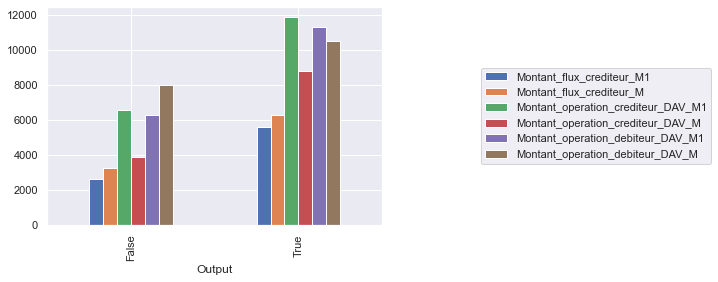

In [121]:
evolution_bancaires_output = groupby_output(df,evolution_cols_bancaire,plot=False)
evolution_bancaires_output.plot.bar()
plt.legend(bbox_to_anchor=(2,0.5),loc='center right')
plt.show()

### Analysis of the evolution :

> Rq: I have not scaled the data of these variables for the plot in order to be able to compare variables two by two 

#### Regarding these variables : :

* Montant_flux_créditeur (M(-1)->M)(Blue & Orange)
* Montant_operation_crediteur_DAV (M(-1)->M) (Green & Red)

Whatever the value of the Output, these variables evolve in the same way

* Montant_flux_créditeur (M(-1)->M)(Blue & Orange) : **Increases**
* Montant_operation_crediteur_DAV (M(-1)->M) : **Decrease**

#### With regard to this variable, it is possible to discriminate in a more relevant way:

* Montant_operation_debiteur_DAV (M(-1)->M) (Purple & Brown) 

| Variable \ Output                     | True  | False    |
| -------------------------- | ----- | -------- |
| Montant Opération Débiteur | Diminue | Augmente |

* Decrease at debtor level for Output = True, increase for Output = False


## Output & Extra Financial Information

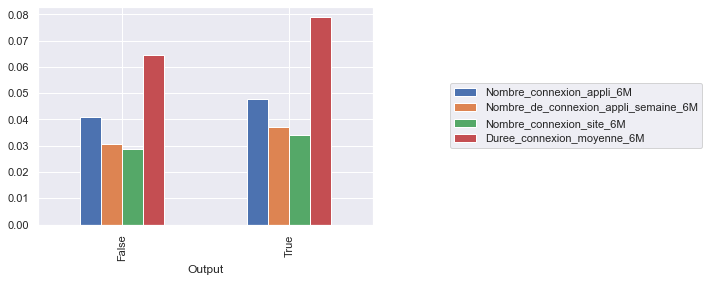

,Nombre_connexion_appli_6M,Nombre_de_connexion_appli_semaine_6M,Nombre_connexion_site_6M,Duree_connexion_moyenne_6M
Output,,,,
False,19.829888,24.388657,30.629056,94.637478
True,25.323693,32.515663,40.371012,124.751721


In [122]:
extra_fi_output = groupby_output(df,extra_financiers_cols)
extra_fi_output

### Link between non-financial data and output

**We observe that when Output is True :**

The customer is more assiduous: 
* The number of connections is greater, the time spent on the website is greater, and therefore the monitoring of the bank account is of better quality
    
**And therefore the opposite when Output is False :**

The customer is less attentive to his financial health
* The latter will spend less time on the website and will be less assiduous 

## Meaning of Output

### Conclusion:

Given the link between banking and Output, it seems clear that Output distinguishes between financially healthy customers:
 
* Less debit transactions (as a proportion), more credit transactions (as a proportion)
* Greater personal stability (given the overall information)
* Better monitoring of its financial situation (in view of the extra-financial link - global information)

# 3. Choice of modelling

## Type of learning and choice of models 

#### Supervised learning

Here we have a case where we have data for which **we know the class of membership**, the idea being to be able to **predict the class of membership of a new client** in the future.

#### Reduce the number of variables

Given the large number of variables (25), it is necessary to **reduce the number of variables** in order to limit the error of the model. A **PCA** will allow us to keep a reduced number of variables which will explain a large part of the variance and thus a large part of the dataset.



#### Selected supervised learning methods :

* SVM Classifier 
* Random Forest Classifier 



| Methods                |  Advantages                                                   |Disadvantages                                                
| -----------------------| ------------------------------------------------------------ | ------------------------------------
| Random Forest          | 1. High performance on classification <br>2. Capable of handling a large number of features <br>3. Can handle unbalanced datasets | 1. Requires accurate selection of hyperparameters <br>2. Black box |
| Machine Vector Support       | 1. Allows for the separation of classes through the use of kernel <br>2. If the separation is clear and therefore the margin<br> is sufficient. The prediction is of very good quality. | 1. Requires a limited number of variables <br>              |

#### Choice of hyperparameters :

In view of the two models we have chosen, it will be necessary to choose **the best hyperparameters**. To do this, we will have to set up an **experimental grid**.




## Choice of metrics

Now that we have a clear understanding of the meaning of the Output we wish to predict, it is relevant to consider the following scenario:

* We want to build a model that detects the "good" users with the ** best accuracy as possible**, while knowing that they are under-represented.

#### The interesting metrics will be :

* **Accuracy_score** : How accurate is our model in predicting the "good"
* **Recall** : The fraction of samples in the class that are correctly predicted. 
* **f1_score** :  Allows to evaluate the global quality of the classification, is calculated from the recall and the accuracy


#### Evaluation of the model's performance :

It is important to keep in mind that our **dataset is highly unbalanced**, and that it will therefore be necessary to use **cross validation to correctly estimate its performance**.

# 4. Principal Component Analysis

In view of the large number of variables, it seems appropriate to me to perform a PCA in order to reduce the number of variables to be used for the model

In [123]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler

### Calibration of the dataset
* X : features 
* y : output

In [124]:
""" I use a MinMaxScaler which after analysis allows to increase
the variance explained on the first components of the PCA"""
scaler = MinMaxScaler()

#### NaN must be removed from the dataframe

In [125]:
df_without_na = df.dropna()

In [126]:
print(df_without_na.shape,df.shape,'-- Nombres de lignes en moins:',(df.shape[0]-df_without_na.shape[0]))

(2833, 28) (3008, 28) -- Nombres de lignes en moins: 175


### Setting up the CPA

In [127]:
df_without_na[features_cols].values.shape

(2833, 24)

In [128]:
def make_pca(df_without_na,features_cols):
    # Loading features in numpy array and output
    X = df_without_na[features_cols].values
    y = df_without_na['Output'].tolist()
    scaler = MinMaxScaler()
    # Calibration of X
    X = scaler.fit_transform(X)
    scaled_df_without_na = pd.DataFrame(X,columns=features_cols)
    # Loading the CPA 
    pca = PCA(random_state=0)
    X = pca.fit_transform(X)
    return(pca,X,y,scaled_df_without_na)

In [129]:
pca,X,y,scaled_df_without_na = make_pca(df_without_na,features_cols)

### PCA analysis

In [130]:
def pca_plot(pca,X):
    # Visualisation of the inertia as a function of the number of components
    fig,ax = plt.subplots(figsize=(14,5))
    sns.set(font_scale=1)

    plt.step(range(X.shape[1]),pca.explained_variance_ratio_.cumsum(),where='mid', label="Cumulative explained variance")
    sns.barplot(np.arange(1,X.shape[1]+1),pca.explained_variance_ratio_,alpha=0.5, color ="g",label='Individual explained variance')
    plt.xlim(0,10)
    plt.plot((0,10),(0.95,0.95),label='95% inertia')
    ax.set_xticklabels([s for s in ax.get_xticklabels()])

    plt.xlabel('Principal components')
    plt.ylabel('Explained variance')
    plt.legend()
    plt.show()

C:\Users\Tijani\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


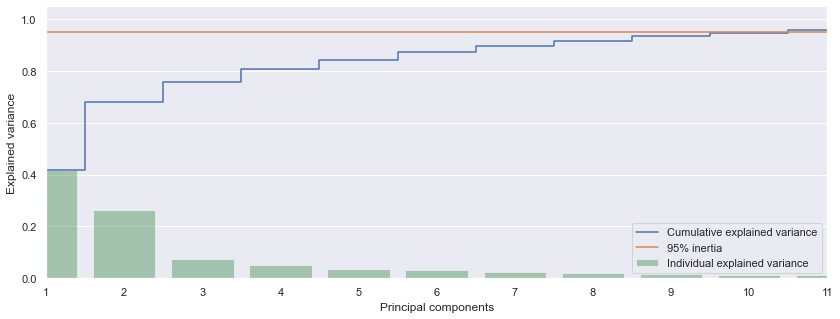

In [131]:
pca_plot(pca,X)

#### We can keep only the first 8 components which explain almost 95% of the variance

###  Visualisation of the PCA

### Construction of a dataframe with the first 8 components of the PCA

In [132]:
n_components_pca = 8

In [133]:
def create_ncomponents_df(X,y,n_components_pca=8):
    """Creation of the dataframe columns"""
    pca_cols = [f'component_{i+1}' for i in range(n_components_pca)]+["Output"]
    principal_components_df = pd.concat([pd.DataFrame(X[:,:n_components_pca]),pd.DataFrame(y)],axis=1)
    principal_components_df.columns = pca_cols
    return(principal_components_df)

In [134]:
principal_components_df = create_ncomponents_df(X,y)
principal_components_df.head()

,component_1,component_2,component_3,component_4,component_5,component_6,component_7,component_8,Output
0,0.424057,-0.494354,-0.136317,0.146934,0.006627,0.012465,0.050998,-0.042334,False
1,0.419411,-0.508167,-0.119277,0.146933,-0.013520,-0.016478,-0.006681,-0.062837,False
2,0.367902,-0.506387,-0.153280,0.156422,0.000045,-0.006143,-0.010367,-0.069196,False
3,0.367346,-0.517589,-0.139363,0.134887,-0.028180,0.219480,-0.028046,-0.040031,False
4,0.381369,-0.484162,-0.145638,0.144035,0.001206,-0.012210,-0.016539,-0.065866,False


### Correlation between variables and principal components

In [135]:
# Display the correlation between the original variables and the principal components
corr_matrix_var_component = pd.concat([scaled_df_without_na,principal_components_df],axis=1).corr()

corr_var_component = corr_matrix_var_component.iloc[len(features_cols):-1,:].transpose().iloc[:len(features_cols),:]

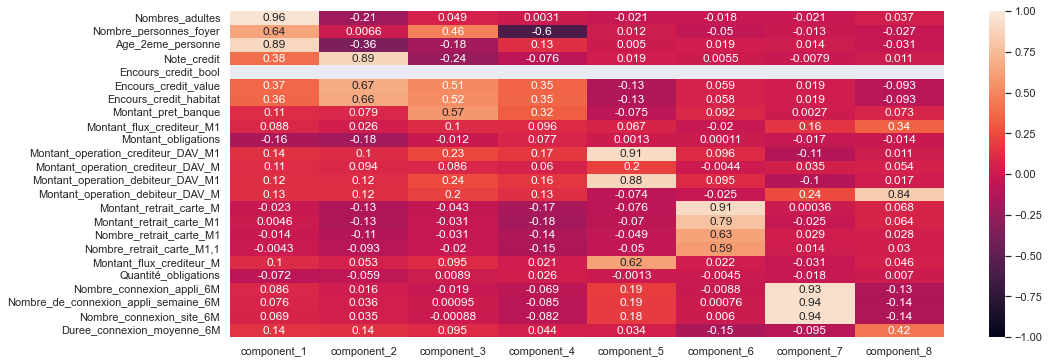

In [136]:
plt.figure(figsize=(16,6))
sns.heatmap(corr_var_component,vmin=-1,vmax=1,annot=True)
plt.show()

#### By displaying these correlations between the principal components and the variables, we find thecategories that we mentioned earlier and which are therefore represented by certain components.


### Workflow pca :
Workflow to create the pca with just the df without NaN and the columns.

In [137]:
def workflow_pca(df_without_na,features_cols,n_components_pca=8):
    pca,X,y,scaled_df_without_na = make_pca(df_without_na,features_cols)
    principal_components_df = create_ncomponents_df(X,y,n_components_pca=n_components_pca)
    return(principal_components_df)

### Pair plot

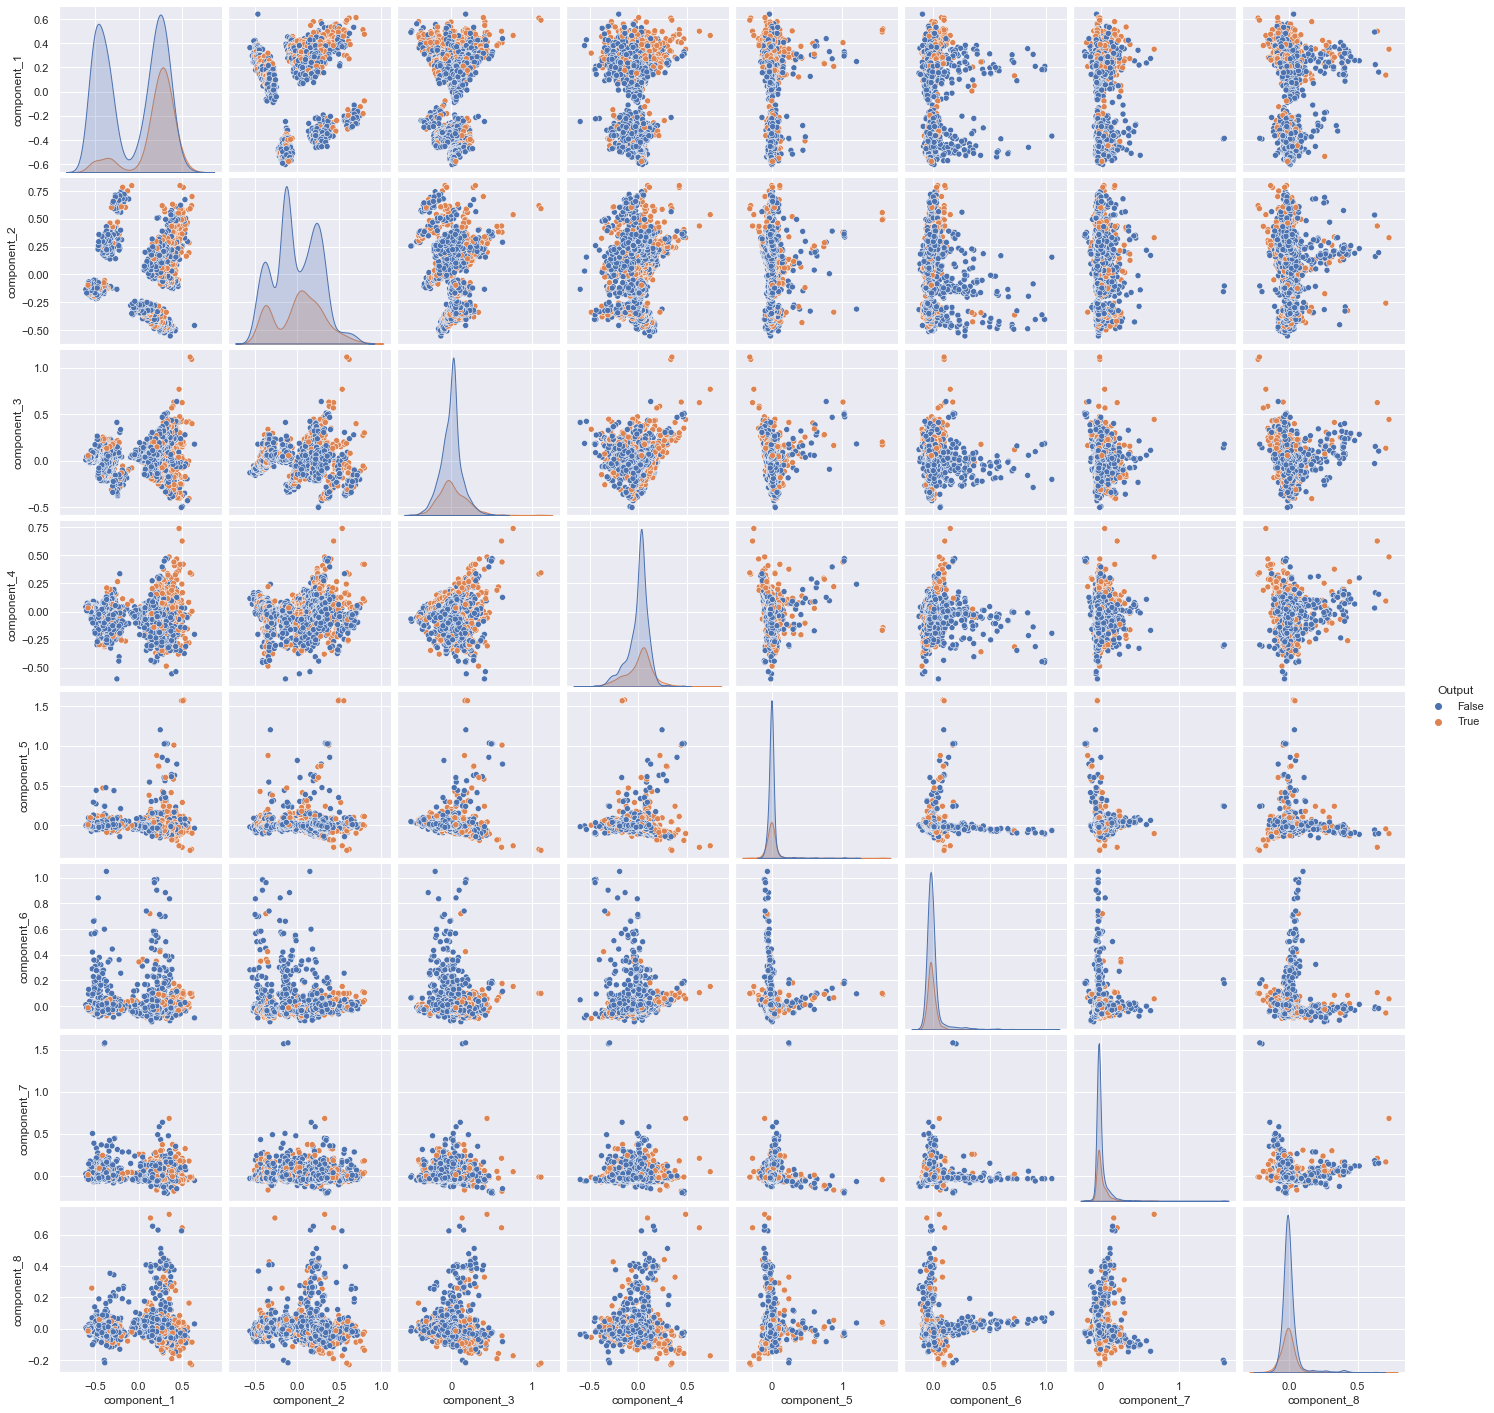

In [138]:
"""Visualisation of the PCA factorial designs""" 
sns.pairplot(principal_components_df,hue='Output')
plt.show()

##### We see that there are no clear separations between the two classes, which suggests that the linear kernel of our SVM will not perform well, and that we will have to consider other kernels.
<br>




# 5 - - Classification with a SVC: Support Vector Machine Classifier


In [139]:
from sklearn.svm import SVC
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform
from sklearn.model_selection import train_test_split

## 5.1. Selection of features and Output

In [140]:
def create_features_principal_comp_df(df):
    X = df.iloc[:,:-1].values
    y = [1 if i else 0 for i in df['Output']]
    y = np.array(y)
    return(X,y)

## 5.2. Optimisation of hyperparameters

In [147]:
def optimize_svc(X,y):
        """Model initialization"""
        svc_model = SVC()
        """Train & Test"""
        X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,random_state=42)
        """Hyperparameters"""
        search_space = {'kernel':['poly','rbf'],'C':uniform(0,10)}
        """No linear kernel in view of the peer plots but poly & Gaussian kernel"""
        ## Two clusters under study 
        ## 1/C gives the separation margin
        """Random Search"""
        svc_random = RandomizedSearchCV(svc_model,search_space, n_jobs=-1, cv = 5,n_iter = 20)
        ## cv = split into 5 parts
        ## Jobs =-1 : Use of the whole processor
        svc_random.fit(X_train,y_train)
        svc_random.best_params_
        best_svc = svc_random.best_estimator_
        return(best_svc,X_train,y_train)

## 5.3. Model performance

Now that we have been able to choose the best parameters for our model we can evaluate its performance using cross validation

In [148]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold

In [149]:
def cross_validation(model,X,y,scoring='accuracy'):
    """k fold-cross validation"""
    model.fit(X,y)
    cv = RepeatedStratifiedKFold(n_splits=5,n_repeats=3,random_state=1)
    scores = cross_val_score(model,X,y,scoring=scoring,cv=cv)
    score = np.mean(scores)
    print(f'{scoring} : {round(score,4)}')
    return(score)

### SVC Workflow
Quickly redo PCA + SCV with dataframe and features_cols
* Creation of a workflow to test with some features for the next part

In [150]:
def workflow_svc(df_without_na,features_cols,scoring_metrics = ["accuracy","recall","f1"],n_components_pca=8):
    """PCA"""
    principal_components_df = workflow_pca(df_without_na,features_cols,n_components_pca)
    """Selection of features for the SVC"""
    X,y = create_features_principal_comp_df(principal_components_df)
    """"SVC optimization"""
    best_svc,X_train,y_train = optimize_svc(X,y)
    """Displaying metrics"""
    scoring_metrics = ["accuracy","recall","f1"]
    best_svc.fit(X_train,y_train)
    scores =[]
    print(f'Here are the CVS metrics for the {len(features_cols)} features :\n')
    for scoring in scoring_metrics:
        score = cross_validation(best_svc,X,y,scoring)
        scores.append(score)
    return(scores)

In [151]:
test_cols =features_cols 

In [152]:
scores_svc = workflow_svc(df_without_na,features_cols)

Here are the CVS metrics for the 24 features :

accuracy : 0.7584
recall : 0.3422
f1 : 0.4406


# 6. Classification with a Random Forest
## 6.1. Selection of features and output

We use the function from the previous section: **create_features_principal_comp_df**

## 6.2. Optimisation of hyperparameters

In [153]:
from sklearn.ensemble import RandomForestClassifier

In [154]:
def optimize_random_forest(X,y):
    # Number of trees in the random forest
    n_estimators = [int(x) for x in np.linspace(start = 200, stop = 1000, num = 10)]
    # Nombre de features ) considérer à chaque split
    max_features = ['auto']
    # Number of features to consider at each split
    max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
    max_depth.append(None)
    # Maximum depth of each tree
    min_samples_split = [2, 5]
    # Minimum number of samples required to split a node
    min_samples_leaf = [1, 2]
    # With or without 
    bootstrap = [True, False]
    ## Create the grid
    random_grid = {'n_estimators': n_estimators,
                   'max_features': max_features,
                   'max_depth': max_depth,
                   'min_samples_split': min_samples_split,
                   'min_samples_leaf': min_samples_leaf,
                   'bootstrap': bootstrap}
    ## Creation of the model
    rfc = RandomForestClassifier()
    X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,random_state=42)
    """Again RandomizedSearchCV"""
    rf_random = RandomizedSearchCV(estimator = rfc, param_distributions = random_grid, n_iter = 10, cv = 3, verbose=2, random_state=42, n_jobs = -1)# Fit the random search model
    rf_random.fit(X_train, y_train)
    best_rf = rf_random.best_estimator_
    return(best_rf,X_train,y_train)

## 6.3.  Model performance

We use the cross_validation function from the previous section

#### Workflow Random Forest 
* Allows to redo the Random Forest quickly for given features

In [155]:
def workflow_random_forest(df_without_na,features_cols,scoring_metrics = ["accuracy","recall","f1"],n_components_pca=8):
    """PCA"""
    principal_components_df = workflow_pca(df_without_na,features_cols,n_components_pca)
    """Selection of features for the random forest"""
    X,y = create_features_principal_comp_df(principal_components_df)
    """Optimization of the random forest"""
    best_rf,X_train,y_train = optimize_random_forest(X,y)
    """Displaying the metrics"""
    best_rf.fit(X_train,y_train)
    scores = []
    print(f'Here are the Random Forest metrics for the {len(features_cols)} features : \n')
    for scoring in scoring_metrics:
        score = cross_validation(best_rf,X,y,scoring)
        scores.append(score)
    return(scores)

In [156]:
scores_random_forest = workflow_random_forest(df_without_na,features_cols,['accuracy','recall','f1'])

Fitting 3 folds for each of 10 candidates, totalling 30 fits
Here are the Random Forest metrics for the 24 features : 

accuracy : 0.7621
recall : 0.4411
f1 : 0.5117


## Comparison of Random Forest & SVC

* It can be seen that Random Forest is more accurate, but much slower than CVS

### The accuracy is 0.76 which for the moment is not satisfactory, so we need to review our feature selection to improve our metrics


# 7.  Improved models with certain feature selections

## Remove features to improve performance
Removing some parameters such as the CSP category allowed us to obtain better results: 
* This is checked with the SVC as it is faster than the random forest

In [157]:
csp_cols = features_cols+['CSP']
print('Avec CSP :')
s2=workflow_svc(df_without_na,csp_cols)
print('\nSans CSP :')
s1=workflow_svc(df_without_na,features_cols)

Avec CSP :
Here are the CVS metrics for the 25 features :

accuracy : 0.7416
recall : 0.1717
f1 : 0.2701

Sans CSP :
Here are the CVS metrics for the 24 features :

accuracy : 0.758
recall : 0.3296
f1 : 0.4306


### What other features can be removed?

For this we can reason as we did last time about the categories of variables:
* Global information 
* Banking operations
* Extra-financial information

### Simplifying non-financial information
#### In relation to the latter category, as can be seen in the analysis, only one variable is sufficient for this group
* Duree_Connexion_6M

In [158]:
new_features_cols = infos_globales_cols+operations_bancaires_cols+['Duree_connexion_moyenne_6M']
# Enlever CSP
new_features_cols.remove('CSP')

In [159]:
print('Keeping only the connection time over 6 months:')
s2=workflow_svc(df_without_na,new_features_cols)

Keeping only the connection time over 6 months:
Here are the CVS metrics for the 21 features :

accuracy : 0.7672
recall : 0.3616
f1 : 0.4639


In [160]:
s2=workflow_random_forest(df_without_na,new_features_cols)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
Here are the Random Forest metrics for the 21 features : 

accuracy : 0.7735
recall : 0.4167
f1 : 0.5001


#### There is still an increase in accuracy, and it is clear that it is not relevant to overload your model with features!

### Keep only 8 features:

#### Finally, it may be interesting to study a model with few features that represent all the categories we have discussed so far.


We will keep only the following variables:


**Overall information :**
* Age_2eme_personne
* Nombres_adultes
* Nombre_personnes_foyer
* Encours_credit_habitat
* Encours_credit_value

**Financial information :**
* Montant_operation_crediteur_DAV_M
* Montant_flux_crediteur_M

**Non-financial information :**
* Duree_connexion_moyenne_6M

In [161]:
final_features = ['Age_2eme_personne','Nombres_adultes','Nombre_personnes_foyer','Montant_flux_crediteur_M','Encours_credit_habitat','Encours_credit_value','Montant_operation_crediteur_DAV_M','Duree_connexion_moyenne_6M']

In [162]:
s2=workflow_svc(df_without_na,final_features)

Here are the CVS metrics for the 8 features :

accuracy : 0.7628
recall : 0.3085
f1 : 0.4204


In [163]:
s2=workflow_random_forest(df_without_na,final_features)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
Here are the Random Forest metrics for the 8 features : 

accuracy : 0.7703
recall : 0.4255
f1 : 0.5117


#### With only 8 features, we find an accuracy almost equivalent to that which we obtained with more than double the number of features! It is therefore relevant here to simplify the model.

# Conclusion

#### Feedback on the data
After loading the data, reformatting where necessary and removing outliers we conducted the dataset analysis.

As we have seen in this study, our dataset is composed of three main categories of customers:

* Global information
* Financial information
* Non-financial information

Although these three categories are composed of many variables, we have seen that it is possible to extract only certain variables in order to explain an entire category.

PCA allows this number of variables to be reduced even further and to obtain components that really explain these categories.

#### Classification
Thanks to the two classification models SVC and Random Forest we were able to make predictions on the variable Output. In order to refine these classification models, great attention was paid to the selection of hyperparameters in order to obtain the best possible predictions.


For the study of the performance of these models, it was necessary to use cross validation as the dataset was poorly distributed on the Output variable. 

Finally, by setting up a workflow for each of the models, we were able to further improve performance by selecting certain variables in each category.


##### Regarding the results : <br>
For the Random Forest which gives the best results in terms of accuracy, recall and f1 :

* accuracy : 0.7735
* recall : 0.4167
* f1 : 0.5001

In terms of accuracy, and given the imbalance of the dataset, the performance is satisfactory.

In terms of Recall, which is quite low, this reflects the fact that our model is "picky". It generates few false positives, but misses some good predictions.

The F1 score is therefore quite low which is due to the Recall itself being weak.

#### A few leads
Having said that, here are some suggestions for improvement for this analysis, which I won't have time to do:


* AdaBoost: A boosting method for classification that mixes "weak" and "strong" classifiers and tends to improve results. To be tested with a reduced number of features.
* Formalise the search for the minimum number of features: Remove features that appear redundant from part 3. For the rest of the features, consider an experimental design to obtain the best possible model. This takes time, however, because the best hyperparameters for the classifier must be chosen each time and cross-validation must be performed.


------------------------------------------------------------------------------------------------------------------
@Author : Hamza Chiheb and Zacharie Bettaieb  | github : ZacharieBe